# Proyek Analisis Data: Bike Sharing Dataset
- Nama: Nabilah Rahmawati
- Email: nabilahrahmawati28@gmail.com
- Id Dicoding: nabilahrahmawati

## 1. Menentukan Pertanyaan Bisnis

---



- Bagaimana tren jumlah pengguna sepeda dalam beberapa tahun terakhir?
- Apakah cuaca berpengaruh terhadap jumlah pengguna sepeda?
- Musim apa yang memiliki intensitas penggunaan sepeda yang tinggi?
- Bagaimana kondisi yang terlihat saat sepeda digunakan pada workingday holiday, dan weekday
- Apakah ada korelasi temprature dan atemprature (suhu yang terasa) terhadap kondisi saat penggunaan sepeda sedang tinggi?

## 2. Menyiapkan semua library yang dibutuhkan

---



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime

## 3. Informasi Terkait Data

---



**Karakteristik Data**
Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv

	- instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit :
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

## 4. Data Wrangling

---



### 4.1. Gathering Data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


- Menyiapkan tabel `hour_df`

In [4]:
hour_df = pd.read_csv("/content/drive/MyDrive/Learning/Dicoding/Data Science/Python/Projek/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### 4.2. Assessing Data

#### Cek Tipe Data

In [5]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB




*   Selanjutnya melakukan konversi variabel `dteday` ke date data type
*   `wheatersit, season, weekday, mnth` dan `yr` akan diubah representasinya menjadi lebih representatif


#### Cek Missing Values

In [6]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Tidak ada missing value

#### Cek data duplikat dan parameter statis

In [7]:
#cek data duplikasi dan ringkasan parameter
print("Jumlah duplikasi: ",hour_df.duplicated().sum())
hour_df.describe(include="all")

Jumlah duplikasi:  0


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000




*   Tidak ada data yang duplikat
*   Variabel `temp, atemp, hum,` dan `windspeed` akan dkembalikan ke nilai sebelum dinormalisasi



### 4.3. Cleaning Data

#### Konversi `dteday` ke tipe date data

In [8]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

####  Mengubah representasi nilai `weathersit, season, weekday, mnth` dan `yr`

In [9]:
hour_df['weekday'] = hour_df['dteday'].dt.day_name()
hour_df['mnth'] = hour_df['dteday'].dt.month_name()
hour_df['yr'] = hour_df['dteday'].dt.year

hour_df.head(2)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,2011,January,0,0,Saturday,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,2011,January,1,0,Saturday,0,1,0.22,0.2727,0.80,0.0,8,32,40


In [10]:
def find_season(season):
    season_string = {1:'Winter', 2:'Spring', 3:'Summer', 4:'Fall'}
    return season_string.get(season)

season_list = []

for season in hour_df['season']:
    season = find_season(season)
    season_list.append(season)

hour_df['season'] = season_list

hour_df.head(2)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,2011,January,0,0,Saturday,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Winter,2011,January,1,0,Saturday,0,1,0.22,0.2727,0.80,0.0,8,32,40


In [11]:
def find_weather(weather):
    weather_string = {1:'Clear/Few/Partly cloudy',
                      2:'Mist/Cloudy',
                      3:'Light Snow/Rain',
                      4:'Heavy Rain/Ice Pallets/Fog'}
    return weather_string.get(weather)

weather_list = []

for weather in hour_df['weathersit']:
    weather = find_weather(weather)
    weather_list.append(weather)

hour_df['weathersit'] = weather_list

hour_df.head(2)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,2011,January,0,0,Saturday,0,Clear/Few/Partly cloudy,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Winter,2011,January,1,0,Saturday,0,Clear/Few/Partly cloudy,0.22,0.2727,0.80,0.0,8,32,40


#### Variabel `temp, atemp, hum,` dan `windspeed` akan dikembalikan ke nilai sebelum dinormalisasi

In [12]:
hour_df['temp'] = hour_df['temp']*41
hour_df['atemp'] = hour_df['atemp']*50
hour_df['hum'] = hour_df['hum']*100
hour_df['windspeed'] = hour_df['windspeed']*67

hour_df.head(3)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,2011,January,0,0,Saturday,0,Clear/Few/Partly cloudy,9.84,14.395,81.0,0.0,3,13,16
1,2,2011-01-01,Winter,2011,January,1,0,Saturday,0,Clear/Few/Partly cloudy,9.02,13.635,80.0,0.0,8,32,40
2,3,2011-01-01,Winter,2011,January,2,0,Saturday,0,Clear/Few/Partly cloudy,9.02,13.635,80.0,0.0,5,27,32


#### Mengubah nama judul kolom

In [13]:
hour_df.rename(columns={
    'dteday': 'dateday',
    'yr': 'year',
    'mnth': 'month',
    'cnt': 'count'
}, inplace=True)

hour_df.head()

,instant,dateday,season,year,month,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,Winter,2011,January,0,0,Saturday,0,Clear/Few/Partly cloudy,9.84,14.395,81.0,0.0,3,13,16
1,2,2011-01-01,Winter,2011,January,1,0,Saturday,0,Clear/Few/Partly cloudy,9.02,13.635,80.0,0.0,8,32,40
2,3,2011-01-01,Winter,2011,January,2,0,Saturday,0,Clear/Few/Partly cloudy,9.02,13.635,80.0,0.0,5,27,32
3,4,2011-01-01,Winter,2011,January,3,0,Saturday,0,Clear/Few/Partly cloudy,9.84,14.395,75.0,0.0,3,10,13
4,5,2011-01-01,Winter,2011,January,4,0,Saturday,0,Clear/Few/Partly cloudy,9.84,14.395,75.0,0.0,0,1,1


#### Simpan hasil data yang sudah dibersihkan

In [14]:
hour_df.to_csv("hour_bikeshare.csv", index=False)

## 5. Exploratory Data Analysis (EDA)

### 5.1. Explore data `hour_df`

##### * Mengelompokkan pengguna sepeda berdasarkan tahun



In [15]:
hour_df.groupby(by='year').agg({
    'casual': 'mean',
    'registered': 'mean',
    'count': ['max', 'min', 'mean', 'sum']
})

casual  registered count                         
           mean        mean   max min        mean      sum
year                                                      
2011  28.600578  115.193869   651   1  143.794448  1243103
2012  42.679757  191.986604   977   1  234.666361  2049576

Berdasarkan hasil tersebut, rata-rata sewa sepedah terbanyak di tahun 2012 baik berdasarkan variabel casual, registered, dan count

##### * Mengelompokkan pengguna sepeda berdasarkan bulan



In [16]:
hour_df.groupby(by=['year', 'month']).agg({
    'count': ['max', 'min', 'mean', 'sum']
})


count                        
                 max min        mean     sum
year month                                  
2011 April       530   1  131.947149   94870
     August      651   1  186.991792  136691
     December    477   1  117.844804   87323
     February    327   1   74.291217   48215
     January     249   1   55.507267   38189
     July        596   1  189.974462  141341
     June        638   1  199.322222  143512
     March       336   1   87.732877   64045
     May         611   1  182.555108  135821
     November    553   1  142.095967  102167
     October     625   1  166.232840  123511
     September   628   1  177.709902  127418
2012 April       822   1  242.651811  174224
     August      941   3  288.310484  214503
     December    759   1  166.729111  123713
     February    610   1  149.041908  103137
     January     559   1  130.558704   96744
     July        913   2  273.665323  203607
     June        900   4  281.708333  202830
     March       957   1  221.904441  164875
     May         873   1  263.259409  195865
     November    729   1  212.623955  152664
     October     963   1  280.848870  198841
     September   977   3  303.573611  218573

Rata-rata terbesar dan jumlah terbanyak pengguna sepeda ada di bulan September tahun 2012. Sebaliknya, rata-rata terkecil dan jumlah terkecil berada di bulan Januari 2011.

#### * Mengelompokkan penyewa sepeda (casual dan registered) berdasarkan season

In [17]:
hour_df.groupby(by='season').agg({
    'casual': 'mean',
    'registered': 'mean',
    'count': ['max', 'min', 'mean']
})


casual  registered count                
             mean        mean   max min        mean
season                                             
Fall    30.666824  168.202032   967   1  198.868856
Spring  46.160581  162.183488   957   1  208.344069
Summer  50.287144  185.729093   977   1  236.016237
Winter  14.290901   96.823668   801   1  111.114569

Para penyewa sepeda baik Casual Dan Registered, lebih banyak pada musim gugur (Summer), dapat dilihat dari rata-ratanya. Sedangkan yang paling sedikit adalah pada musim semi (Winter) dengan rata-rata yang paling kecil.

#### * Mengelompokkan pengguna sepeda berdasarkan musim

In [18]:
hour_df.groupby(by='season').agg({
    'count': ['max', 'min', 'mean', 'sum']
})


count                         
         max min        mean      sum
season                               
Fall     967   1  198.868856   841613
Spring   957   1  208.344069   918589
Summer   977   1  236.016237  1061129
Winter   801   1  111.114569   471348

Rata-rata terbanyak dan pengguna sepeda terbanyak berada di Summer Season (musim panas). Sebaliknya, rata-rata dan jumlah pengguna terkecil berada di Winter Season (musim dingin).

#### * Mengelompokkan pengguna sepeda berdasarkan cuaca

In [19]:
hour_df.groupby(by='weathersit').agg({
    'count': ['max', 'min', 'mean', 'sum']
})


count                         
                             max min        mean      sum
weathersit                                               
Clear/Few/Partly cloudy      977   1  204.869272  2338173
Heavy Rain/Ice Pallets/Fog   164  23   74.333333      223
Light Snow/Rain              891   1  111.579281   158331
Mist/Cloudy                  957   1  175.165493   795952

Saat Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog, sedikit yang menggunakan sepeda. Sedangkan, saat Clear, Few clouds, Partly cloudy, Partly cloudy, banyak yang menggunakan sepeda

#### * Mengelompokkan pengguna sepeda berdasarkan holiday

In [20]:
hour_df.groupby(by='holiday').agg({
    'count': ['max', 'min', 'mean', 'sum']
})


count                        
          max min       mean      sum
holiday                              
0         977   1  190.42858  3214244
1         712   1  156.87000    78435

Penyewa sepeda lebih suka menyewa sepeda saat hari-hari biasa dibanding hari libur (holiday)

#### * Mengelompokkan pengguna sepeda berdasarkan workingday

In [21]:
hour_df.groupby(by='workingday').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

count                         
             max min        mean      sum
workingday                               
0            783   1  181.405332  1000269
1            977   1  193.207754  2292410

Menguatkan data sebelumnya, penyewa lebih suka menggunakan sepeda pada hari biasa (workingday)

#### * Mengelompokkan pengguna sepeda berdasarkan hari

In [22]:
hour_df.groupby(by='weekday').agg({
    'count':['max','min','mean']
})


count                
            max min        mean
weekday                        
Friday      957   1  196.135907
Monday      968   1  183.744655
Saturday    783   1  190.209793
Sunday      776   1  177.468825
Thursday    976   1  196.436665
Tuesday     970   1  191.238891
Wednesday   977   1  191.130505

Dalam seminggu, rata-rata jumlah penyewa sepeda terbanyak berada di hari Kamis (Thursday). Dan disimpulkan, rata-rata penyewa menggunakan sepeda di hari biasa dibanding hari libur (Sunday)

#### * Mengelompokkan temp, atemp, dan humidity berdasarkan season

In [23]:
hour_df.groupby(by='season').agg({
    'temp': ['max', 'min', 'mean'],
    'atemp': ['max', 'min', 'mean'],
    'hum': ['max', 'min', 'mean']
})


temp                     atemp                       hum        \
          max    min       mean     max     min       mean    max   min   
season                                                                    
Fall    31.16   5.74  17.348658  34.090   7.575  20.786887  100.0  16.0   
Spring  38.54   6.56  22.331191  43.940   8.335  26.027347  100.0  16.0   
Summer  41.00  15.58  28.962816  50.000  12.120  32.800176  100.0  16.0   
Winter  29.52   0.82  12.265012  32.575   0.000  14.905824  100.0   0.0   

                   
             mean  
season             
Fall    66.712429  
Spring  62.702200  
Summer  63.316726  
Winter  58.134842

* Rata-rata temperatur dan atemp tertinggi terjadi pada musim panas (Summer season) yang selanjutnya diikuti oleh spring, fall, dan winter.
* Rata-rata humidity tertinggi terjadi pada musim terjadi pada musim gugur (fall season) yang selanjutnya diikuti oleh summer, spring, dan winter.

#### * Mengelompokkan penyewa pengguna sepeda ( casual dan registered) berdasarkan season

In [24]:

hour_df.groupby(by='season').agg({
    'casual': 'mean',
    'registered': 'mean',
    'count': ['max', 'min', 'mean']
})


casual  registered count                
             mean        mean   max min        mean
season                                             
Fall    30.666824  168.202032   967   1  198.868856
Spring  46.160581  162.183488   957   1  208.344069
Summer  50.287144  185.729093   977   1  236.016237
Winter  14.290901   96.823668   801   1  111.114569

#### * Korelasi tiap variabel


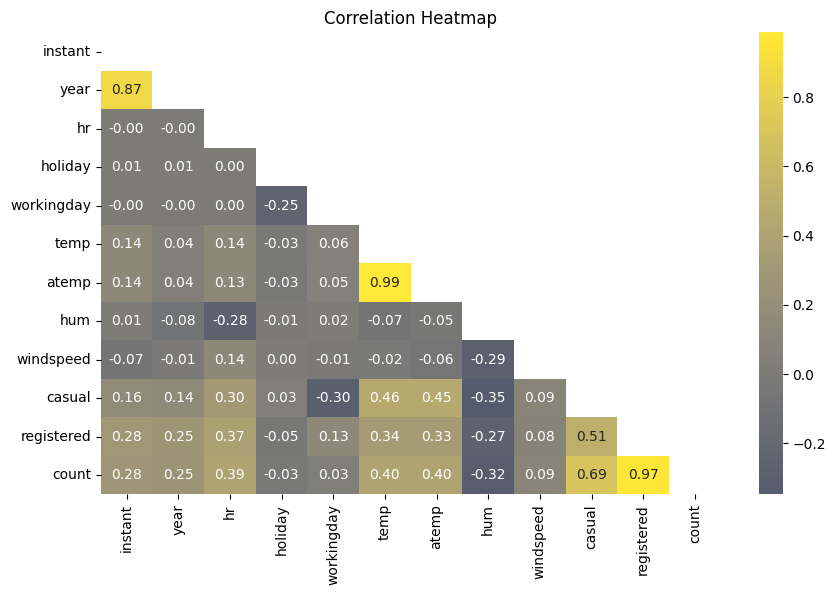

In [25]:
fig, ax = plt.subplots(figsize=(10,6))
correlation_matrix = hour_df.corr(numeric_only=True)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(
    correlation_matrix,
    annot=True,
    mask=mask,
    cmap="cividis",
    center=0,
    fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

* atemp dan temp sangat berkorelasi (0.99).
* hum memiliki korelasi negatif dengan temp dan atemp (-0.07 dan -0.05).
* casual cukup berkorelasi dengan temp dan atemp (0.46 dan 0.45), dan negatif dengan hum (-0.35).
* registered memiliki pola yang sama seperti casual, dan berkorelasi dengan casual (0.51).
* count berkorelasi kuat dengan temp, atemp, casual, dan registered (0.40, 0.40, 0.69, dan 0.97), dan negatif dengan hum (-0.32).

## 6. Visualization & Explanatory Analysis

- Bagaimana tren jumlah pengguna sepeda dalam beberapa tahun terakhir?
- Apakah cuaca berpengaruh terhadap jumlah pengguna sepeda?
- Musim apa yang memiliki intensitas penggunaan sepeda yang tinggi?
- Bagaimana kondisi yang terlihat saat sepeda digunakan pada workingday holiday, dan weekday
- Apakah ada korelasi antara temprature yang menunjukkan kondisi saat penggunaan sepeda sedang tinggi?

### 6.1. Bagaimana tren jumlah pengguna sepeda dalam beberapa tahun terakhir?

In [27]:
monthly_user_df = hour_df.resample(rule='M', on='dateday').agg({
    "casual": "sum",
    "registered": "sum",
    "count": "sum"
})


monthly_user_df.index = monthly_user_df.index.strftime('%b-%y')

monthly_user_df.head(2)

,casual,registered,count
dateday,,,
Jan-11,3073,35116,38189
Feb-11,6242,41973,48215


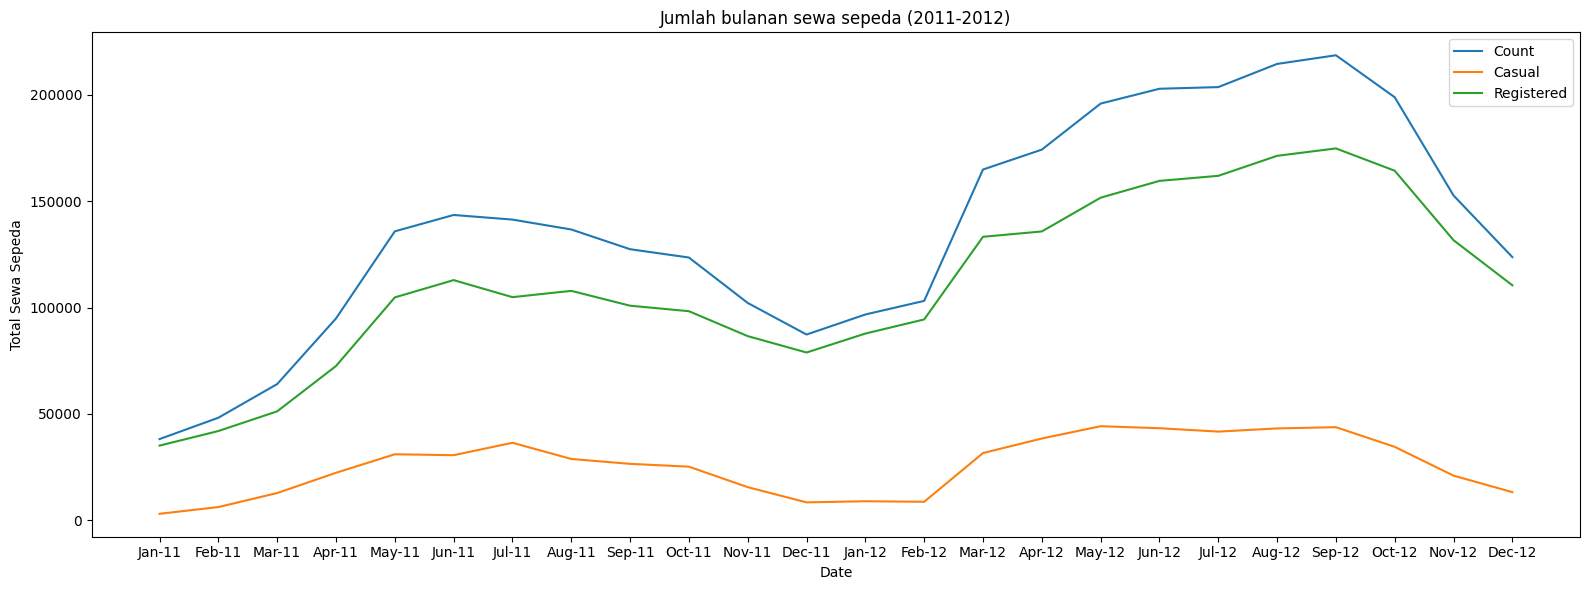

In [28]:
plt.figure(figsize=(16,6))

# Create a line plot using the sns.lineplot() function
sns.lineplot(x="dateday", y="count", data=monthly_user_df, label='Count')
sns.lineplot(x="dateday", y="casual", data=monthly_user_df, label='Casual')
sns.lineplot(x="dateday", y="registered", data=monthly_user_df, label='Registered')

# Add labels and a title to the plot
plt.xlabel("Date")
plt.ylabel("Total Sewa Sepeda")
plt.title("Jumlah bulanan sewa sepeda (2011-2012)")

# Show the plot
plt.tight_layout()
plt.show()

* Jumlah sewa sepedah berdasarkan `count` lebih besar di tahun 2012 dibanding 2011
* Jumlah penyewaan sepeda dari `registered` lebih besar dibanding `casual`,
meskipun keduanya menunjukkan tren yang sama sepanjang tahun. Pertengahan tahun menunjukkan kenaikan tren, sedangkan akhir tahun menunjukkan penurunan tren.
* Puncak penyewaan sepeda tahun 2011 terjadi di bulan Juni lalu menurun hingga Desember. Sedangkan penyewaan sepeda tersepi berada di bulan Januari 2011.
Tahun 2012, puncak penyewaan sepeda terjadi pada bulan September lalu menurun hingga bulan Desember 2012. Sedangkan penyewaan sepi terjadi di bulan Januari 2012.

### 6.2. Apakah cuaca berpengaruh terhadap jumlah pengguna sepeda?


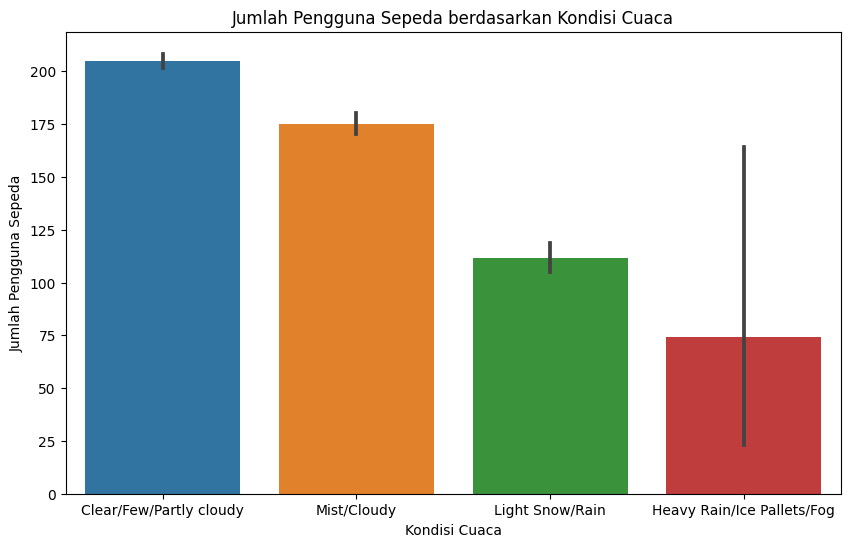

In [29]:
plt.figure(figsize=(10,6))
sns.barplot(
    x='weathersit',
    y='count',
    data=hour_df)

plt.title('Jumlah Pengguna Sepeda berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Pengguna Sepeda')
plt.show()


Terdapat hubungan antara kondisi cuaca dan penyewa sepeda, Kondisi cuaca saat sedang clear/few/partly cloudy menjadi kondisi yang paling diminati, lalu diikuti cuaca mist/cloudy, light snow/rain, dan terakhir ketika cuaca heavy rain/ice pallets/fog menjadi yang paling sedikit diminati.

### 6.3. Musim apa yang memiliki intensitas sewa sepeda yang tinggi?

In [33]:
season_user_df = hour_df.groupby("season").agg({
    "casual": "sum",
    "registered": "sum",
    "count": "sum"
})

season_user_df = season_user_df.reset_index()

season_user_df

,season,casual,registered,count
0,Fall,129782,711831,841613
1,Spring,203522,715067,918589
2,Summer,226091,835038,1061129
3,Winter,60622,410726,471348


In [42]:
season_user_df_unpivoted = pd.melt(season_user_df,
                                      id_vars=['season'],
                                      value_vars=['casual', 'registered'],
                                      var_name='status',
                                      value_name='count')

season_user_df_unpivoted

<ipython-input-42-6061caff2677>:1: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  season_user_df_unpivoted = pd.melt(season_user_df,


,season,status,count
0,Fall,casual,129782
1,Spring,casual,203522
2,Summer,casual,226091
3,Winter,casual,60622
4,Fall,registered,711831
5,Spring,registered,715067
6,Summer,registered,835038
7,Winter,registered,410726


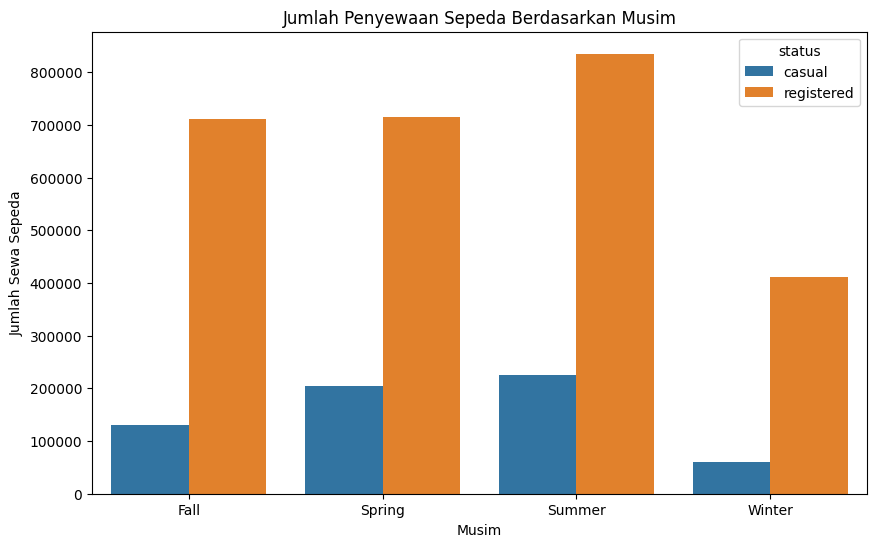

In [46]:
plt.figure(figsize=(10,6))

sns.barplot(x='season', y='count', data=season_user_df_unpivoted, hue='status')

plt.xlabel("Musim")
plt.ylabel("Jumlah Sewa Sepeda")
plt.title("Jumlah Penyewaan Sepeda Berdasarkan Musim")

plt.show()

Sewa sepeda tertinggi berada di musim panas (Summer Season) dan terendah berada di musim dingin (Winter)
Antara variabel Casual dan Registered menunjukkan hal yang sama, dimana peminjaman sepeda tertinggi berada di musim panas dan terendah di musim dingin.

### 6.4. Bagaimana kondisi yang terlihat saat sepeda digunakan pada workingday holiday, dan weekday

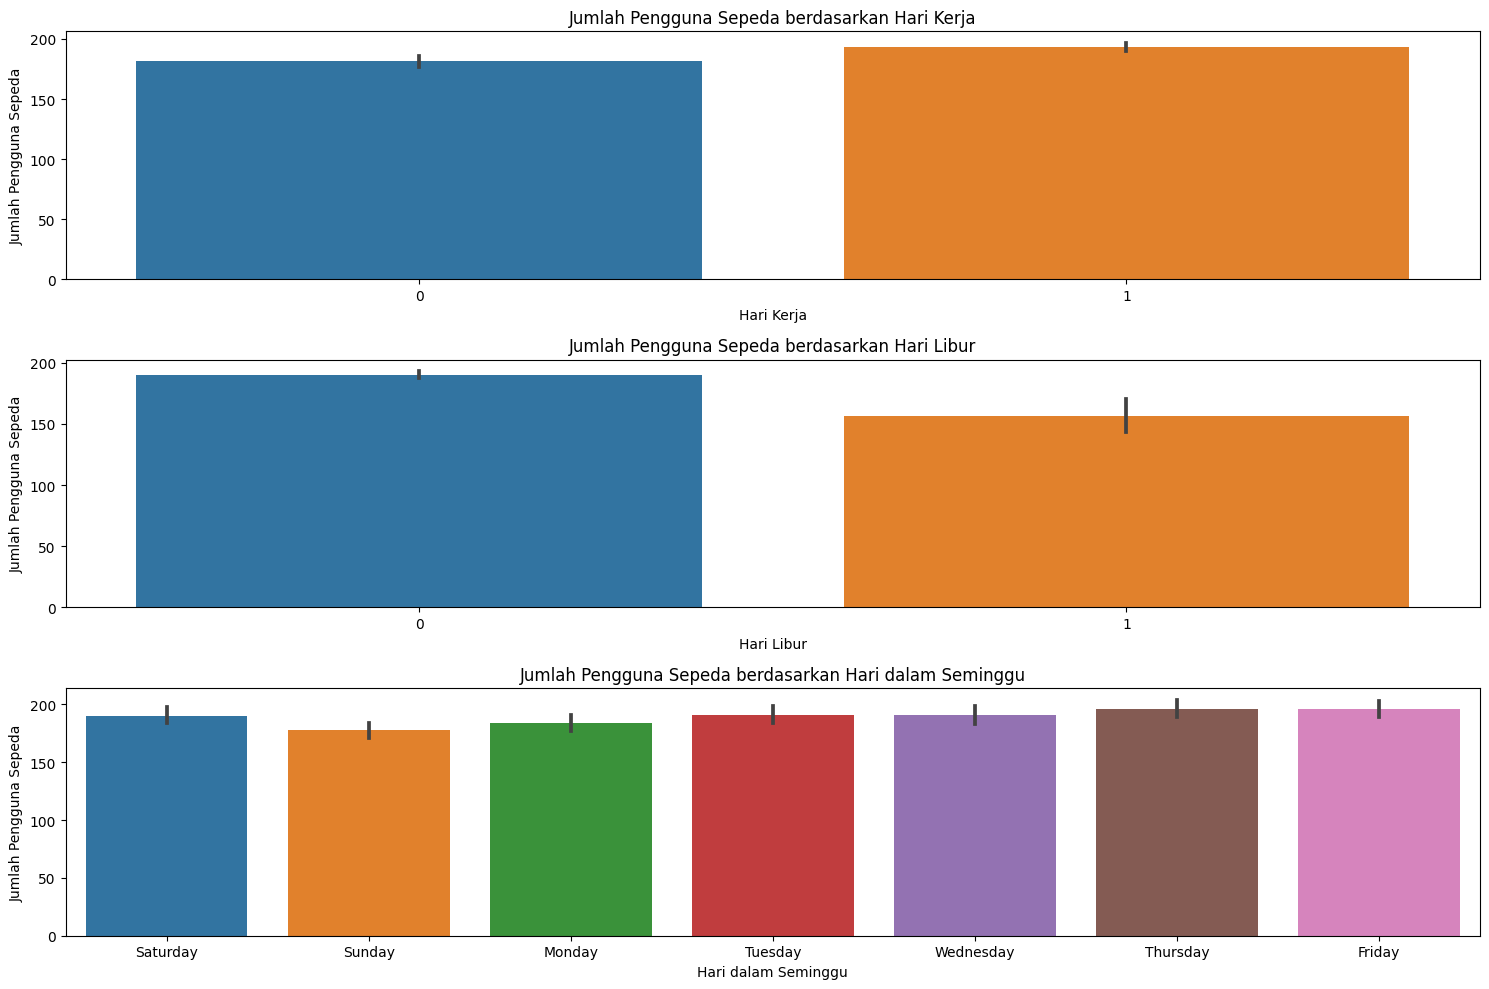

In [49]:

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15,10))

# Berdasarkan workingday
sns.barplot(
    x='workingday',
    y='count',
    data=hour_df,
    ax=axes[0])
axes[0].set_title('Jumlah Pengguna Sepeda berdasarkan Hari Kerja')
axes[0].set_xlabel('Hari Kerja')
axes[0].set_ylabel('Jumlah Pengguna Sepeda')

# Berdasarkan holiday
sns.barplot(
  x='holiday',
  y='count',
  data=hour_df,
  ax=axes[1])
axes[1].set_title('Jumlah Pengguna Sepeda berdasarkan Hari Libur')
axes[1].set_xlabel('Hari Libur')
axes[1].set_ylabel('Jumlah Pengguna Sepeda')

# Berdasarkan weekday
sns.barplot(
  x='weekday',
  y='count',
  data=hour_df,
  ax=axes[2])
axes[2].set_title('Jumlah Pengguna Sepeda berdasarkan Hari dalam Seminggu')
axes[2].set_xlabel('Hari dalam Seminggu')
axes[2].set_ylabel('Jumlah Pengguna Sepeda')

plt.tight_layout()
plt.show()


* Jumlah penyewa sepeda lebih banyak di hari kerja dibandingkan dengan akhir pekan. 0 menandakan akhir pekan dan 1 menandakan hari kerja.
* Jumlah penyewa sepeda jauh lebih banyak pada hari biasa dibandingkan hari libur.
* Jumlah penyewa sepeda pada hari Kamis menjadi posisi pertama sebagai hari dengan penyewa sepeda terbanyak, sedangkan jumlah penyewa sepeda paling sedikit berada di hari Minggu

### 6.5. Apakah ada korelasi temprature dan atemprature (suhu yang terasa) terhadap kondisi saat penggunaan sepeda sedang tinggi?

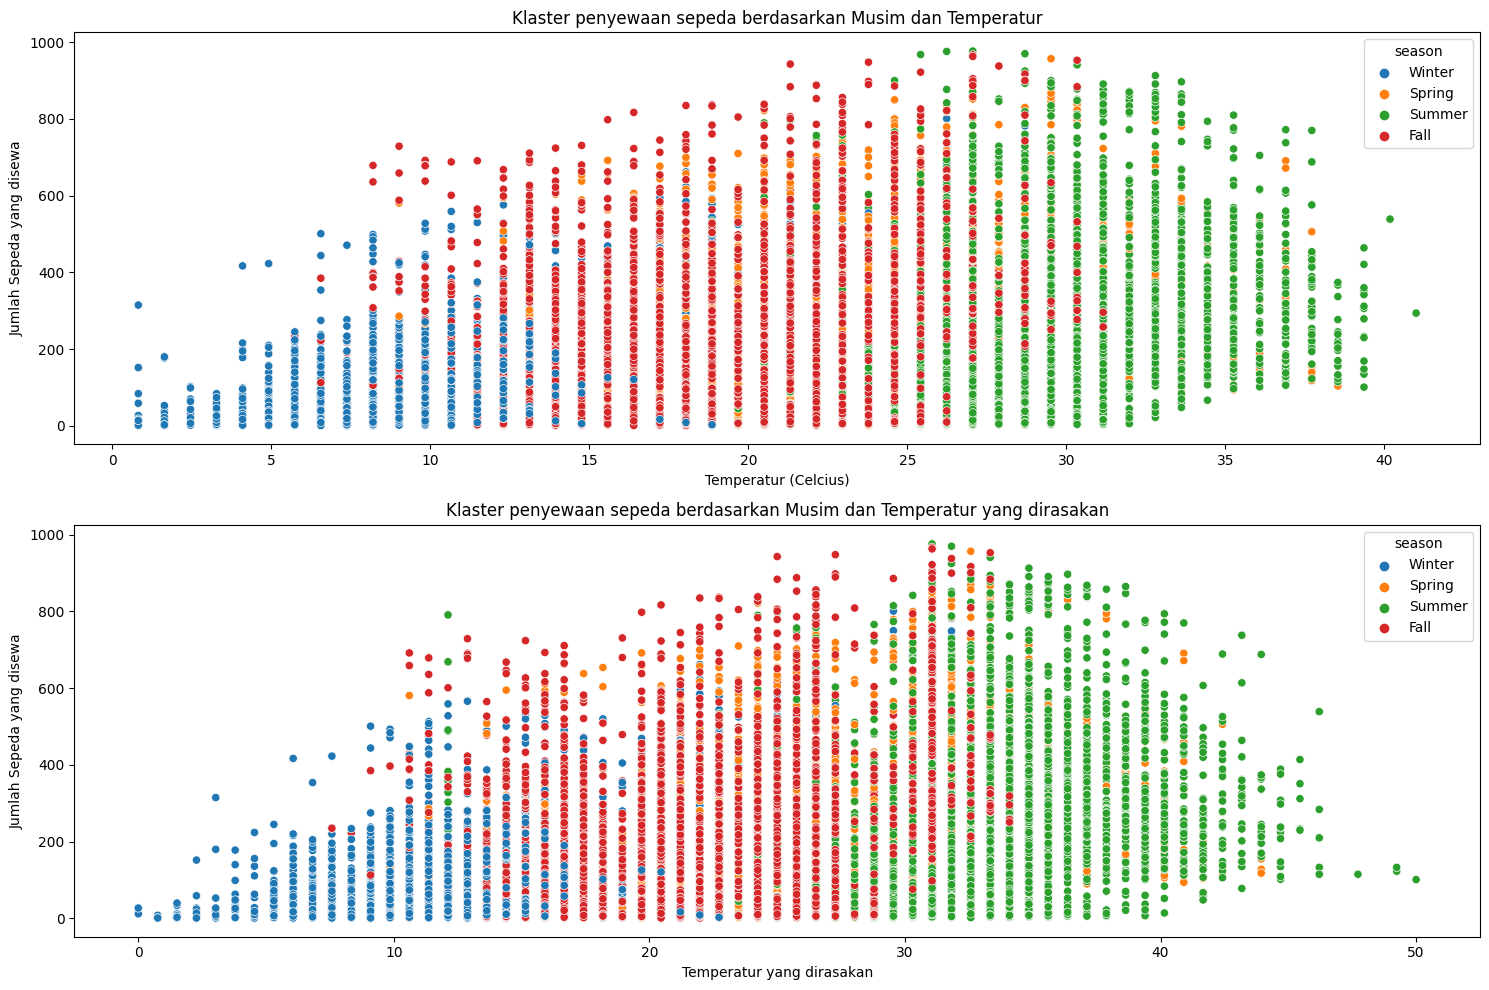

In [56]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15,10))

##temp
sns.scatterplot(x='temp', y='count', data=hour_df, hue='season', ax=axes[0])
axes[0].set_title('Klaster penyewaan sepeda berdasarkan Musim dan Temperatur')
axes[0].set_xlabel('Temperatur (Celcius)')
axes[0].set_ylabel('Jumlah Sepeda yang disewa')


##atemp
sns.scatterplot(x='atemp', y='count', data=hour_df, hue='season', ax=axes[1])
axes[1].set_title('Klaster penyewaan sepeda berdasarkan Musim dan Temperatur yang dirasakan')
axes[1].set_xlabel('Temperatur yang dirasakan')
axes[1].set_ylabel('Jumlah Sepeda yang disewa')

plt.tight_layout()
plt.show()

* Hubungan antara `temp` dengan `count` serta `atemp` dengan `count` menunjukkan
korelasi positif antara dua variabel
* Pada temperature rendah, jumlah sewa sepeda juga ikut rendah dan terjadi pada musim dingin. Sedangkan saat temperature tinggi, jumlah sewa sepeda ikut menaik dan terjadi di musim panas.
*Di hari lainnya dengan kondisi temperature seperti itu, diperkirakan jumlah sewa sepeda akan tinggi


## Conclusion

- Conclution pertanyaan 1\
Tahun 2012 menjadi tahun yang paling banyak dalam penyewaan sepeda. Hal itu didukung dengan hasil perbandingan `count`(jumlah sepeda yang disewa) terhadap tahun dan  perbandingan `casual` dan `registered` terhadap tahun. Setiap tahun menunjukkan tren yang sama. Pertengahan tahun terjadi kenaikan jumlah sewa, sedangkan akhir tahun terjadi penurunan. Adapun terjadi perbedaan bulan puncak penyewaan sepeda di tiap tahunnya. Puncak penyewaan sepeda tahun 2011 terjadi di bulan Juni lalu menurun hingga Desember. Sedangkan penyewaan sepeda tersepi berada di bulan Januari 2011. Tahun 2012, puncak penyewaan sepeda terjadi pada bulan September lalu menurun hingga bulan Desember 2012. Sedangkan penyewaan sepi terjadi di bulan Januari 2012.

- Conclution pertanyaan 2\
Ya, berpengaruh. Kondisi cuaca saat sedang clear/few/partly cloudy menjadi kondisi yang paling diminati dan ketika cuaca heavy rain/ice pallets/fog menjadi yang paling sedikit diminati.


- Conclution pertanyaan 3\
Sewa sepeda tertinggi berada di musim panas (Summer Season) dan terendah berada di musim dingin (Winter)

- Conclution pertanyaan 4\
Jumlah penyewa lebih banyak di hari kerja dibanding akhir pekan/hari libur. Berdasakan hari biasa, hari Kamis menjadi posisi pertama sebagai hari dengan penyewa sepeda terbanyak, sedangkan jumlah penyewa sepeda paling sedikit berada di hari Minggu.

- Conclution pertanyaan 5\
temp dan atemp memiliki korelasi positif dengan count, sehingga jika temperatur (temp dan atemp) meningkat, maka pengguna sepeda juga cenderung meningkat. Maka, pada musim dingin dengan temperatur rendah dan dingin memiliki jumlah sewa sepeda yang lebih sedikit. Sedangkan pada musim panas dengan temperatur tinggi dan panas memiliki jumlah sewa sepeda yang banyak juga.